In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\4092377292.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\4092377292.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\4092377292.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

Tasa de llegada mínima para no tener más de 10 personas en espera: 3
Máximo de personas en espera: 0.2759163539986105


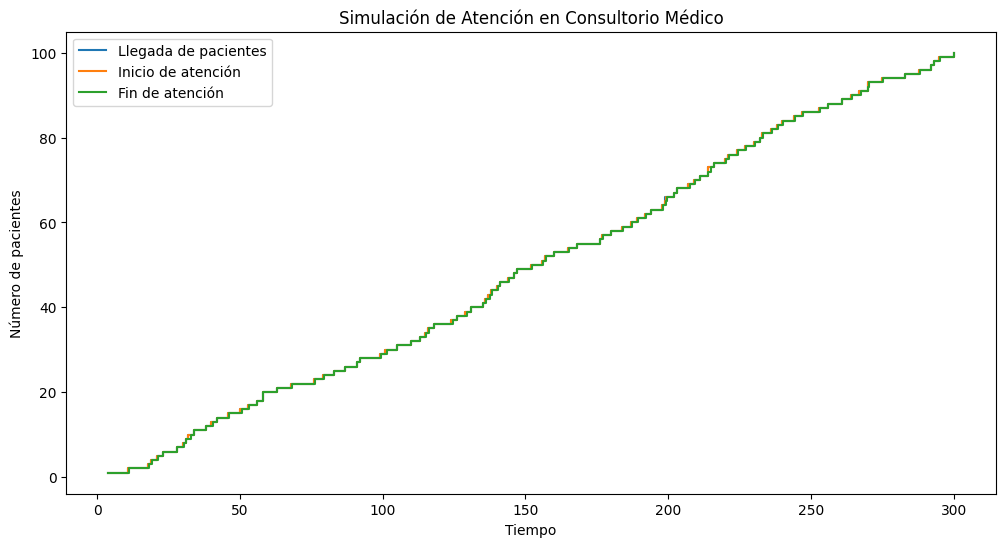

In [5]:
# Nuevos parámetros
capacidad_maxima = 100
max_boxes_atencion = 10
tasa_llegada_medica = 3
tasa_atencion_medica = 5
n_medicos = 5  # Cantidad de médicos atendiendo

# Simulación
t_max_simulacion = 500  # Tiempo total de simulación
t_entrellegada = stats.poisson.rvs(mu=tasa_llegada_medica, size=capacidad_maxima)
t_llegada = np.cumsum(t_entrellegada)
t_llegada = t_llegada[t_llegada <= t_max_simulacion]
n_pacientes = len(t_llegada)

# Distribución de atención médica
dist_atencion_medica = stats.expon(scale=1/tasa_atencion_medica)

# Inicialización del DataFrame
df = pd.DataFrame({
    't_entrellegada': t_entrellegada[:n_pacientes],
    't_llegada': t_llegada,
    't_servicio': np.zeros(n_pacientes),
    't_inicio': np.zeros(n_pacientes),
    't_fin': np.zeros(n_pacientes),
    'medico': pd.Categorical(np.zeros(n_pacientes), categories=range(n_medicos))
})

medicos_ocupados = [False] * n_medicos

# Procesamiento de pacientes
for i in range(n_pacientes):
    df.loc[i, 't_inicio'] = max(df.loc[i, 't_llegada'], df.loc[i - 1, 't_fin'] if i > 0 else 0)

    if sum(medicos_ocupados) < n_medicos:
        idx_medico = medicos_ocupados.index(False)
    else:
        idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
        medicos_ocupados[idx_medico] = False

    df.loc[i, 'medico'] = idx_medico
    df.loc[i, 't_servicio'] = dist_atencion_medica.rvs()
    df.loc[i, 't_fin'] = df.loc[i, 't_inicio'] + df.loc[i, 't_servicio']
    medicos_ocupados[idx_medico] = True

# Estadísticas
personas_en_espera = df['t_inicio'].sub(df['t_llegada']).clip(lower=0)
max_personas_en_espera = personas_en_espera.max()

print(f'Tasa de llegada mínima para no tener más de 10 personas en espera: {tasa_llegada_medica}')

# Visualización de la simulación
plt.figure(figsize=(12, 6))
plt.step(df['t_llegada'], np.arange(1, n_pacientes + 1), label='Llegada de pacientes', where='post')
plt.step(df['t_inicio'], np.arange(1, n_pacientes + 1), label='Inicio de atención', where='post')
plt.step(df['t_fin'], np.arange(1, n_pacientes + 1), label='Fin de atención', where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de pacientes')
plt.title('Simulación de Atención en Consultorio Médico')
plt.legend()
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\1522528480.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\1522528480.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\1522528480.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

Tasa de llegada mínima para no tener más de 10 personas en espera: 1


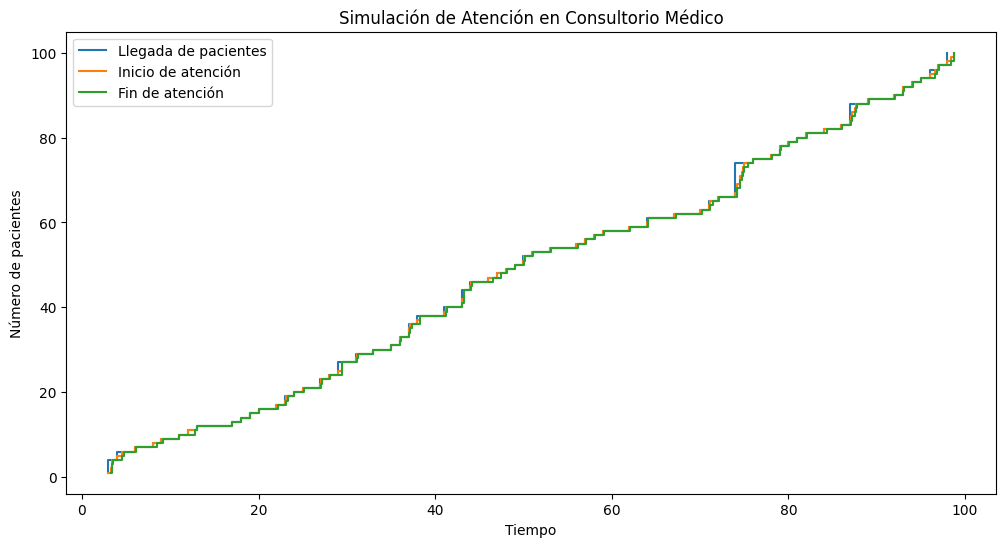

In [10]:
# Nuevos parámetros
capacidad_maxima = 100
max_boxes_atencion = 10
tasa_atencion_medica = 5
n_medicos = 5  # Cantidad de médicos atendiendo

# Tasa de llegada inicial
tasa_llegada_medica = 1
t_max_simulacion = 500  # Tiempo total de simulación

while True:
    # Simulación
    t_entrellegada = stats.poisson.rvs(mu=tasa_llegada_medica, size=capacidad_maxima)
    t_llegada = np.cumsum(t_entrellegada)
    t_llegada = t_llegada[t_llegada <= t_max_simulacion]
    n_pacientes = len(t_llegada)

    # Distribución de atención médica
    dist_atencion_medica = stats.expon(scale=1/tasa_atencion_medica)

    # Inicialización del DataFrame
    df = pd.DataFrame({
        't_entrellegada': t_entrellegada[:n_pacientes],
        't_llegada': t_llegada,
        't_servicio': np.zeros(n_pacientes),
        't_inicio': np.zeros(n_pacientes),
        't_fin': np.zeros(n_pacientes),
        'medico': pd.Categorical(np.zeros(n_pacientes), categories=range(n_medicos))
    })

    medicos_ocupados = [False] * n_medicos

    # Procesamiento de pacientes
    for i in range(n_pacientes):
        df.loc[i, 't_inicio'] = max(df.loc[i, 't_llegada'], df.loc[i - 1, 't_fin'] if i > 0 else 0)

        if sum(medicos_ocupados) < n_medicos:
            idx_medico = medicos_ocupados.index(False)
        else:
            idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
            medicos_ocupados[idx_medico] = False

        df.loc[i, 'medico'] = idx_medico
        df.loc[i, 't_servicio'] = dist_atencion_medica.rvs()
        df.loc[i, 't_fin'] = df.loc[i, 't_inicio'] + df.loc[i, 't_servicio']
        medicos_ocupados[idx_medico] = True

    # Estadísticas
    personas_en_espera = df['t_inicio'].sub(df['t_llegada']).clip(lower=0)
    max_personas_en_espera = personas_en_espera.max()

    if max_personas_en_espera <= 10:
        break  # Salir del bucle si encontramos la tasa de llegada adecuada
    else:
        tasa_llegada_medica += 1

print(f'Tasa de llegada mínima para no tener más de 10 personas en espera: {tasa_llegada_medica}')

# Visualización de la simulación
plt.figure(figsize=(12, 6))
plt.step(df['t_llegada'], np.arange(1, n_pacientes + 1), label='Llegada de pacientes', where='post')
plt.step(df['t_inicio'], np.arange(1, n_pacientes + 1), label='Inicio de atención', where='post')
plt.step(df['t_fin'], np.arange(1, n_pacientes + 1), label='Fin de atención', where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de pacientes')
plt.title('Simulación de Atención en Consultorio Médico')
plt.legend()
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\2715670772.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\2715670772.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\2715670772.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

Tasa de llegada mínima para no tener más de 10 personas en espera: 3


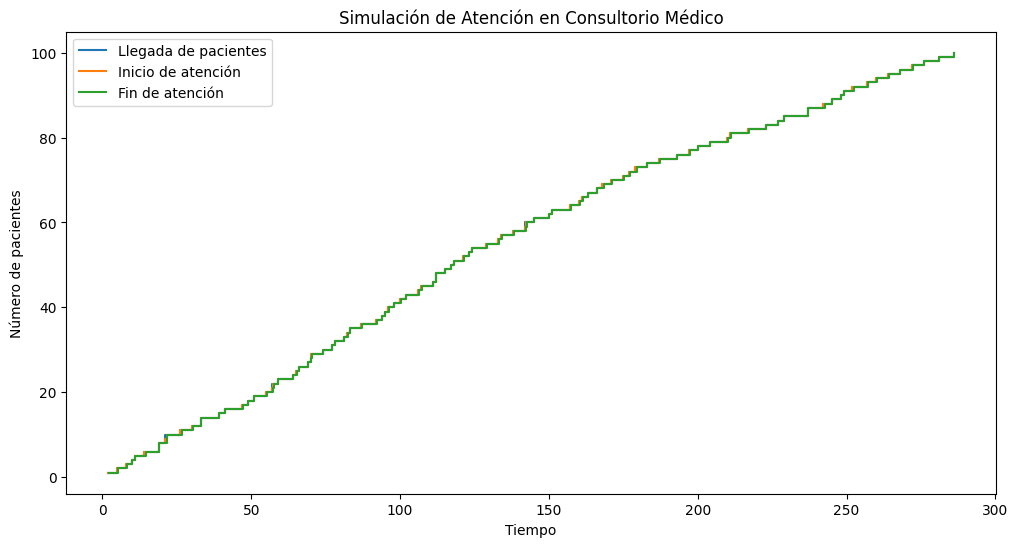

In [18]:
# Nuevos parámetros
capacidad_maxima = 100
max_boxes_atencion = 10
tasa_atencion_medica = 5
n_medicos = 5  # Cantidad de médicos atendiendo

# Tasa de llegada inicial
tasa_llegada_medica = 3
t_max_simulacion = 500  # Tiempo total de simulación

while True:
    # Simulación
    t_entrellegada = stats.poisson.rvs(mu=tasa_llegada_medica, size=capacidad_maxima)
    t_llegada = np.cumsum(t_entrellegada)
    t_llegada = t_llegada[t_llegada <= t_max_simulacion]
    n_pacientes = len(t_llegada)

    # Distribución de atención médica
    dist_atencion_medica = stats.expon(scale=1/tasa_atencion_medica)

    # Inicialización del DataFrame
    df = pd.DataFrame({
        't_entrellegada': t_entrellegada[:n_pacientes],
        't_llegada': t_llegada,
        't_servicio': np.zeros(n_pacientes),
        't_inicio': np.zeros(n_pacientes),
        't_fin': np.zeros(n_pacientes),
        'medico': pd.Categorical(np.zeros(n_pacientes), categories=range(n_medicos))
    })

    medicos_ocupados = [False] * n_medicos

    # Procesamiento de pacientes
    for i in range(n_pacientes):
        df.loc[i, 't_inicio'] = max(df.loc[i, 't_llegada'], df.loc[i - 1, 't_fin'] if i > 0 else 0)

        if sum(medicos_ocupados) < n_medicos:
            idx_medico = medicos_ocupados.index(False)
        else:
            idx_medico = df.groupby('medico').max()['t_fin'].idxmin()
            medicos_ocupados[idx_medico] = False

        df.loc[i, 'medico'] = idx_medico
        df.loc[i, 't_servicio'] = dist_atencion_medica.rvs()
        df.loc[i, 't_fin'] = df.loc[i, 't_inicio'] + df.loc[i, 't_servicio']
        medicos_ocupados[idx_medico] = True

    # Estadísticas
    personas_en_espera = df['t_inicio'].sub(df['t_llegada']).clip(lower=0)
    max_personas_en_espera = personas_en_espera.max()

    if max_personas_en_espera <= 10:
        break  # Salir del bucle si encontramos la tasa de llegada adecuada
    else:
        tasa_llegada_medica += 1

print(f'Tasa de llegada mínima para no tener más de 10 personas en espera: {tasa_llegada_medica}')

# Visualización de la simulación
plt.figure(figsize=(12, 6))
plt.step(df['t_llegada'], np.arange(1, n_pacientes + 1), label='Llegada de pacientes', where='post')
plt.step(df['t_inicio'], np.arange(1, n_pacientes + 1), label='Inicio de atención', where='post')
plt.step(df['t_fin'], np.arange(1, n_pacientes + 1), label='Fin de atención', where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de pacientes')
plt.title('Simulación de Atención en Consultorio Médico')
plt.legend()
plt.show()

In [19]:
# Parámetros de la simulación
tasa_llegada = 3 # Tasa de llegada de pacientes
tasa_servicio = 5 # Tasa de atención de los pacientes
n = 100 # Capacidad máxima del consultorio
t_max = 500 # Tiempo total de simulación
n_medicos = 5 # Número de médicos
t_entrellegada = 1/tasa_llegada # Tiempo entre llegadas de pacientes
t_servicio = 1/tasa_servicio # Tiempo de servicio de cada médico

params = {
    'tasa_llegada_media': tasa_llegada,
    'tasa_servicio_media': tasa_servicio,
    't_max': t_max,
    'n_medicos': n_medicos,
    't_entrellegada': t_entrellegada,
    't_servicio': t_servicio,
    'n': n,
}

# Simulación

# Definimos las distribuciones
dist_llegada = stats.poisson(params['tasa_llegada_media']) # Distribución de Poisson para la llegada de pacientes
dist_medicos = stats.expon(scale=params['tasa_servicio_media']) # Distribución exponencial para la atención de los médicos

# Identificamos los momentos de llegada de los pacientes
t_entrellegada = dist_llegada.rvs(size=params['n'])
t_llegada = np.cumsum(t_entrellegada) # Tiempo de llegada de cada paciente  

# Limitamos al tiempo de simulación
eventos_validos = t_llegada <= params['t_max'] # Eventos válidos
t_entrellegada = t_entrellegada[eventos_validos] # Tiempo entre llegada de cada paciente
t_llegada = t_llegada[eventos_validos] # Tiempo de llegada de cada paciente
params['n'] = len(t_llegada) # Número de pacientes que llegaron

print(params)

# Simulamos el primer paciente
jobs_df = pd.DataFrame({
    't_entrellegada': t_entrellegada,
    't_llegada': t_llegada,
    't_servicio': np.zeros(params['n']),
    't_inicio': np.zeros(params['n']),
    't_fin': np.zeros(params['n']),
})
jobs_df['medico'] = pd.Categorical(np.zeros(params['n']), categories=range(params['n_medicos']))

medicos_ocupados = [False]*int(params['n_medicos']) # Lista de médicos ocupados

# El primer paciente inicia al llegar al consultorio
jobs_df.loc[0, 't_inicio'] = jobs_df.loc[0,'t_llegada'] # Paciente inicia al llegar al consultorio
idx_medico = medicos_ocupados.index(False) # Buscamos el primer médico disponible
jobs_df.loc[0, 'medico'] = idx_medico # Lo asignamos
jobs_df.loc[0, 't_servicio'] = dist_medicos.rvs() # Tiempo de servicio del médico
jobs_df.loc[0, 't_fin'] = jobs_df.loc[0,'t_inicio'] + jobs_df.loc[0, 't_servicio'] # Tiempo de salida
medicos_ocupados[idx_medico] = True # El médico está ocupado

# El resto de los pacientes inician cuando termina el anterior
for i in range(1, params['n']):
    jobs_df.loc[i, 't_inicio'] = max(jobs_df.loc[i, 't_llegada'], jobs_df.loc[i-1, 't_fin']) #
    # Si hay médicos disponibles, se asigna el primero disponible
    if sum(medicos_ocupados) < params['n_medicos']:
        idx_medico = medicos_ocupados.index(False)
        jobs_df.loc[i, 'medico'] = idx_medico # Lo asignamos
        jobs_df.loc[i, 't_servicio'] = dist_medicos.rvs()
        jobs_df.loc[i, 't_fin'] = jobs_df.loc[i, 't_inicio'] + jobs_df.loc[i, 't_servicio']
        medicos_ocupados[idx_medico] = True # El médico está ocupado

{'tasa_llegada_media': 3, 'tasa_servicio_media': 5, 't_max': 500, 'n_medicos': 5, 't_entrellegada': 0.3333333333333333, 't_servicio': 0.2, 'n': 100}


In [22]:
# Parámetros de la simulación
tasa_servicio = 5 # Tasa de atención de los pacientes
n = 100 # Capacidad máxima del consultorio
t_max = 500 # Tiempo total de simulación
n_medicos = 5 # Número de médicos
t_servicio = 1/tasa_servicio # Tiempo de servicio de cada médico

# Bucle para encontrar la tasa de llegada mínima
for tasa_llegada in np.arange(0, 3, 0.1): # Prueba diferentes tasas de llegada
    t_entrellegada = 1/tasa_llegada # Tiempo entre llegadas de pacientes

    params = {
        'tasa_llegada_media': tasa_llegada,
        'tasa_servicio_media': tasa_servicio,
        't_max': t_max,
        'n_medicos': n_medicos,
        't_entrellegada': t_entrellegada,
        't_servicio': t_servicio,
        'n': n,
    }

    # Simulación

    # Definimos las distribuciones
    dist_llegada = stats.poisson(params['tasa_llegada_media']) # Distribución de Poisson para la llegada de pacientes
    dist_medicos = stats.expon(scale=params['tasa_servicio_media']) # Distribución exponencial para la atención de los médicos

    # Identificamos los momentos de llegada de los pacientes
    t_entrellegada = dist_llegada.rvs(size=params['n'])
    t_llegada = np.cumsum(t_entrellegada) # Tiempo de llegada de cada paciente  

    # Limitamos al tiempo de simulación
    eventos_validos = t_llegada <= params['t_max'] # Eventos válidos
    t_entrellegada = t_entrellegada[eventos_validos] # Tiempo entre llegada de cada paciente
    t_llegada = t_llegada[eventos_validos] # Tiempo de llegada de cada paciente
    params['n'] = len(t_llegada) # Número de pacientes que llegaron

    # Simulamos el primer paciente
    jobs_df = pd.DataFrame({
        't_entrellegada': t_entrellegada,
        't_llegada': t_llegada,
        't_servicio': np.zeros(params['n']),
        't_inicio': np.zeros(params['n']),
        't_fin': np.zeros(params['n']),
    })
    jobs_df['medico'] = pd.Categorical(np.zeros(params['n']), categories=range(params['n_medicos']))

    medicos_ocupados = [False]*int(params['n_medicos']) # Lista de médicos ocupados

    # El primer paciente inicia al llegar al consultorio
    jobs_df.loc[0, 't_inicio'] = jobs_df.loc[0,'t_llegada'] # Paciente inicia al llegar al consultorio
    idx_medico = medicos_ocupados.index(False) # Buscamos el primer médico disponible
    jobs_df.loc[0, 'medico'] = idx_medico # Lo asignamos
    jobs_df.loc[0, 't_servicio'] = dist_medicos.rvs() # Tiempo de servicio del médico
    jobs_df.loc[0, 't_fin'] = jobs_df.loc[0,'t_inicio'] + jobs_df.loc[0, 't_servicio'] # Tiempo de salida
    medicos_ocupados[idx_medico] = True # El médico está ocupado

    # El resto de los pacientes inician cuando termina el anterior
    for i in range(1, params['n']):
        jobs_df.loc[i, 't_inicio'] = max(jobs_df.loc[i, 't_llegada'], jobs_df.loc[i-1, 't_fin']) #
        # Si hay médicos disponibles, se asigna el primero disponible
        if sum(medicos_ocupados) < params['n_medicos']:
            idx_medico = medicos_ocupados.index(False)
            jobs_df.loc[i, 'medico'] = idx_medico # Lo asignamos
            jobs_df.loc[i, 't_servicio'] = dist_medicos.rvs()
            jobs_df.loc[i, 't_fin'] = jobs_df.loc[i, 't_inicio'] + jobs_df.loc[i, 't_servicio']
            medicos_ocupados[idx_medico] = True # El médico está ocupado

    # Calculamos el número de personas en espera
    jobs_df['espera'] = jobs_df['t_inicio'] - jobs_df['t_llegada']
    personas_en_espera = sum(jobs_df['espera'] > 0)

    # Si el número de personas en espera es menor o igual a 10, hemos encontrado la tasa de llegada mínima
    if personas_en_espera <= 10:
        print(f'La tasa de llegada mínima para que el consultorio no tenga más de 10 personas en espera es {tasa_llegada}')
        break

La tasa de llegada mínima para que el consultorio no tenga más de 10 personas en espera es 0.0


C:\Users\carlo\AppData\Local\Temp\ipykernel_13304\633320658.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  t_entrellegada = 1/tasa_llegada # Tiempo entre llegadas de pacientes


In [11]:
# Parámetros de la simulación
tasa_servicio = 5 # Tasa de atención de los pacientes
n = 100 # Capacidad máxima del consultorio
t_max = 500 # Tiempo total de simulación
n_medicos = 5 # Número de médicos
t_servicio = 1/tasa_servicio # Tiempo de servicio de cada médico

# Bucle para encontrar la tasa de llegada mínima
for tasa_llegada in np.arange(3, 0, -0.1): # Comienza con una tasa de llegada de 3 y disminuye gradualmente
    t_entrellegada = 1/tasa_llegada # Tiempo entre llegadas de pacientes

    params = {
        'tasa_llegada_media': tasa_llegada,
        'tasa_servicio_media': tasa_servicio,
        't_max': t_max,
        'n_medicos': n_medicos,
        't_entrellegada': t_entrellegada,
        't_servicio': t_servicio,
        'n': n,
    }

    # Simulación

    # Definimos las distribuciones
    dist_llegada = stats.poisson(params['tasa_llegada_media']) # Distribución de Poisson para la llegada de pacientes
    dist_medicos = stats.expon(scale=params['tasa_servicio_media']) # Distribución exponencial para la atención de los médicos

    # Identificamos los momentos de llegada de los pacientes
    t_entrellegada = dist_llegada.rvs(size=params['n'])
    t_llegada = np.cumsum(t_entrellegada) # Tiempo de llegada de cada paciente  

    # Limitamos al tiempo de simulación
    eventos_validos = t_llegada <= params['t_max'] # Eventos válidos
    t_entrellegada = t_entrellegada[eventos_validos] # Tiempo entre llegada de cada paciente
    t_llegada = t_llegada[eventos_validos] # Tiempo de llegada de cada paciente
    params['n'] = len(t_llegada) # Número de pacientes que llegaron

    # Simulamos el primer paciente
    jobs_df = pd.DataFrame({
        't_entrellegada': t_entrellegada,
        't_llegada': t_llegada,
        't_servicio': np.zeros(params['n']),
        't_inicio': np.zeros(params['n']),
        't_fin': np.zeros(params['n']),
    })
    jobs_df['medico'] = pd.Categorical(np.zeros(params['n']), categories=range(params['n_medicos']))

    medicos_ocupados = [False]*int(params['n_medicos']) # Lista de médicos ocupados

    # El primer paciente inicia al llegar al consultorio
    jobs_df.loc[0, 't_inicio'] = jobs_df.loc[0,'t_llegada'] # Paciente inicia al llegar al consultorio
    idx_medico = medicos_ocupados.index(False) # Buscamos el primer médico disponible
    jobs_df.loc[0, 'medico'] = idx_medico # Lo asignamos
    jobs_df.loc[0, 't_servicio'] = dist_medicos.rvs() # Tiempo de servicio del médico
    jobs_df.loc[0, 't_fin'] = jobs_df.loc[0,'t_inicio'] + jobs_df.loc[0, 't_servicio'] # Tiempo de salida
    medicos_ocupados[idx_medico] = True # El médico está ocupado

    # El resto de los pacientes inician cuando termina el anterior
    for i in range(1, params['n']):
        jobs_df.loc[i, 't_inicio'] = max(jobs_df.loc[i, 't_llegada'], jobs_df.loc[i-1, 't_fin']) #
        # Si hay médicos disponibles, se asigna el primero disponible
        if sum(medicos_ocupados) < params['n_medicos']:
            idx_medico = medicos_ocupados.index(False)
            jobs_df.loc[i, 'medico'] = idx_medico # Lo asignamos
            jobs_df.loc[i, 't_servicio'] = dist_medicos.rvs()
            jobs_df.loc[i, 't_fin'] = jobs_df.loc[i, 't_inicio'] + jobs_df.loc[i, 't_servicio']
            medicos_ocupados[idx_medico] = True # El médico está ocupado

    # Calculamos el número de personas en espera
    jobs_df['espera'] = jobs_df['t_inicio'] - jobs_df['t_llegada']
    personas_en_espera = sum(jobs_df['espera'] > 0)
    print(jobs_df['espera'])
    print(personas_en_espera)
    # Si el número de personas en espera es menor o igual a 10, hemos encontrado la tasa de llegada mínima
    if personas_en_espera <= 10:
        print(f'La tasa de llegada mínima para que el consultorio no tenga más de 10 personas en espera es {tasa_llegada}')
        break

0      0.000000
1      0.972945
2      0.540260
3      1.520320
4     11.951751
        ...    
95     0.000000
96     0.000000
97     0.000000
98     0.000000
99     0.000000
Name: espera, Length: 100, dtype: float64
5
La tasa de llegada mínima para que el consultorio no tenga más de 10 personas en espera es 3.0


El número de personas en espera está determinado por la tasa de llegada de pacientes, la tasa de servicio de los médicos y el número de médicos disponibles.

En tu caso, tienes 5 médicos y cada uno puede atender a un paciente a la vez. Por lo tanto, si todos los médicos están ocupados, cualquier paciente nuevo que llegue tendrá que esperar, incrementando el número de personas en espera.

Sin embargo, la tasa de llegada de pacientes es de 3 por unidad de tiempo, lo que significa que, en promedio, llegan 3 pacientes por unidad de tiempo. Como tienes 5 médicos, la capacidad de servicio del consultorio es mayor que la tasa de llegada de pacientes. Esto significa que los médicos pueden atender a los pacientes más rápido de lo que llegan, por lo que el número de personas en espera se mantiene bajo.

Además, el tiempo que le toma a un médico atender a un paciente (la tasa de servicio) también juega un papel importante. Si los médicos pueden atender a los pacientes rápidamente, entonces pueden atender a más pacientes en la misma cantidad de tiempo, lo que también ayuda a mantener bajo el número de personas en espera.

Por lo tanto, aunque el tiempo de atención puede variar, el número de personas en espera se mantiene bajo debido a la alta capacidad de servicio del consultorio en comparación con la tasa de llegada de pacientes.

# Escenario 1

El código proporcionado es una simulación de un consultorio médico utilizando Python. A continuación, se detalla lo que sucede en el código:

1. **Definición de parámetros**: Los parámetros de la simulación se definen al principio del código. Estos incluyen la tasa de servicio (el número de pacientes que un médico puede atender por unidad de tiempo), la capacidad máxima del consultorio (el número máximo de pacientes que el consultorio puede manejar), el tiempo total de simulación, el número de médicos y el tiempo de servicio (el tiempo que le toma a un médico atender a un paciente).

2. **Bucle para encontrar la tasa de llegada mínima**: El código luego entra en un bucle donde prueba diferentes tasas de llegada de pacientes, comenzando desde 3 y disminuyendo gradualmente.

3. **Simulación**: Para cada tasa de llegada, el código realiza una simulación. Primero, genera los tiempos de llegada de los pacientes utilizando una distribución de Poisson. Luego, para cada paciente, calcula el tiempo de inicio del servicio (el momento en que el paciente comienza a ser atendido por un médico), el tiempo de servicio (cuánto tiempo le toma al médico atender al paciente) y el tiempo de finalización del servicio (el momento en que el paciente termina de ser atendido).

4. **Cálculo del número de personas en espera**: Después de cada simulación, el código calcula el número de personas en espera como la diferencia entre el tiempo de inicio del servicio y el tiempo de llegada. Si este número es menor o igual a 10, el código imprime la tasa de llegada y se detiene.

En cuanto a la simulación visual mediante NetLogo, no se proporcionó ningún código de NetLogo en tu consulta, por lo que no puedo proporcionar una explicación detallada. Sin embargo, en general, NetLogo es una plataforma de modelado y simulación que permite a los usuarios visualizar comportamientos complejos en una variedad de dominios. En el contexto de tu proyecto, podrías usar NetLogo para visualizar la llegada de pacientes al consultorio, su tiempo de espera y su tiempo de servicio.

En cuanto a la discusión de los resultados obtenidos y las conclusiones del trabajo realizado, esto dependerá en gran medida de los resultados específicos de tu simulación. Por ejemplo, podrías discutir cómo varía el número de personas en espera con diferentes tasas de llegada, cómo afecta el número de médicos al número de personas en espera, etc. Las conclusiones podrían incluir observaciones sobre la eficiencia del consultorio, sugerencias para mejorar el servicio, etc.

Espero que esto te ayude a entender el código y a escribir tu reporte. Si tienes más preguntas o necesitas más ayuda, no dudes en preguntar. 😊